<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [63]:
#loading data into python
df = pd.read_csv('sat_scores.csv')
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [64]:
# converting it into dictionary format
dfdict = df.to_dict('list')
dfdict.items()

dict_items([('State', ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']), ('Rate', [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45]), ('Verbal', [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506]), ('Math', [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 55

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [65]:
# making a dataframe from SAT dictionary
fromdict = pd.DataFrame(dfdict)
fromdict.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [66]:
# making a dataframe from CSV
fromcsv = pd.read_csv('sat_scores.csv')
fromcsv.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [6]:
#there does not appear to be any difference between using a dictionary or loading from file. 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [67]:
# looking at first 10 rows of dataframe
df.head(10)

# data essentially seems to record verbal and math scores of SAT results by state. 
# 'Rate' is rather ambiguous but it seems to indicate the participation rate of students within the state in the test.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [68]:
#creating function for data dictionary
def satdata(df):
    #description of variables
    des = {'State':'state', 'Rate':'participation rate', 'Verbal':'verbal score', 'Math':'math score'}
    des = pd.Series(des)
    #datatypes
    types = df.dtypes
    #combining above two into nice table
    datadict = pd.concat([types, des], axis=1, sort=False)
    datadict.columns = ['data type', 'description']
    print(datadict)
    #shape of dataframe
    print('Shape:', df.shape)

satdata(df)

       data type         description
State     object               state
Rate       int64  participation rate
Verbal     int64        verbal score
Math       int64          math score
Shape: (52, 4)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Users\schen24\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


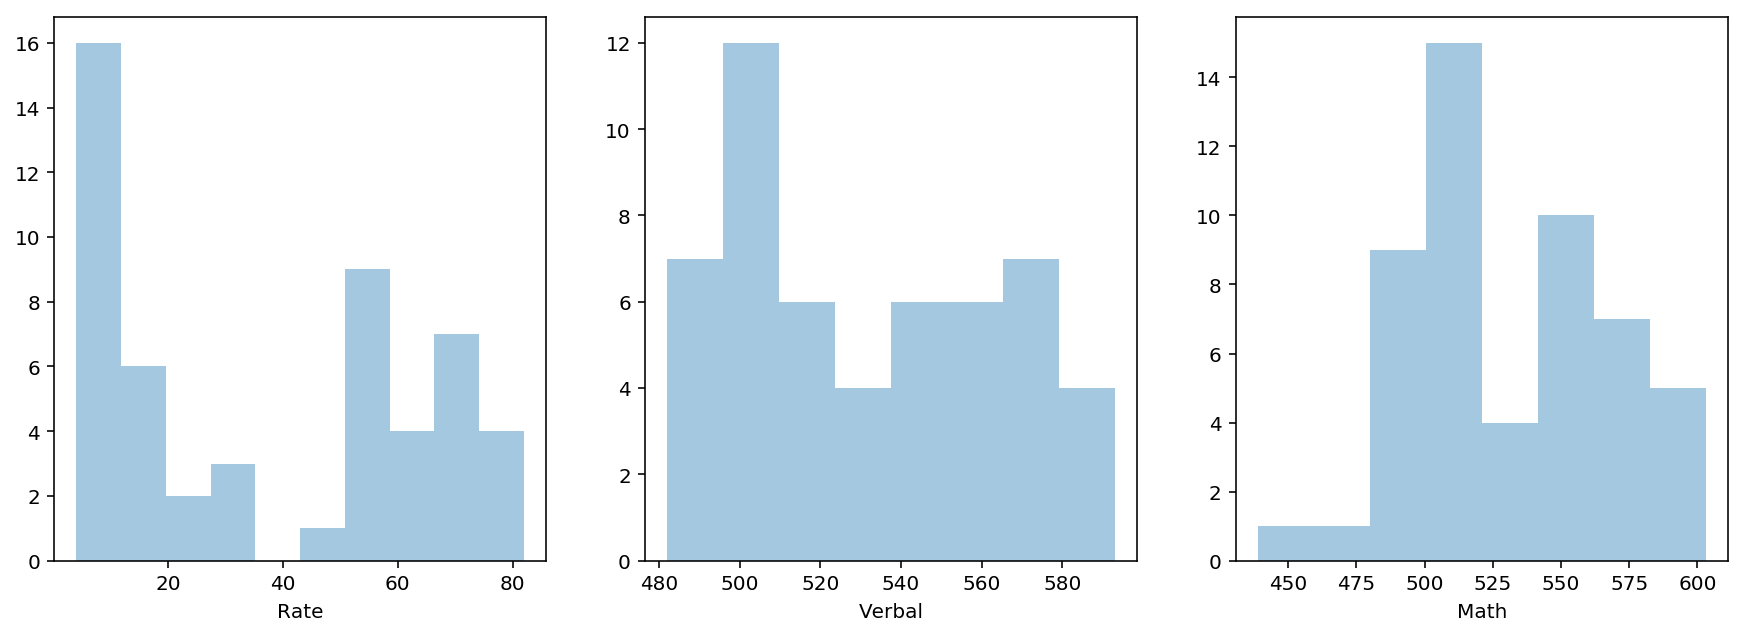

In [69]:
fig, ax =plt.subplots(1,3, figsize=(15,5))

rate = pd.Series(df.Rate, name="Rate")
verbal = pd.Series(df.Verbal, name="Verbal")
math = pd.Series(df.Math, name="Math")

sns.distplot(rate, kde=False, bins=10, ax=ax[0])
sns.distplot(verbal, kde=False, bins=8, ax=ax[1])
sns.distplot(math, kde=False, bins=8, ax=ax[2])

fig.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

C:\Users\schen24\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


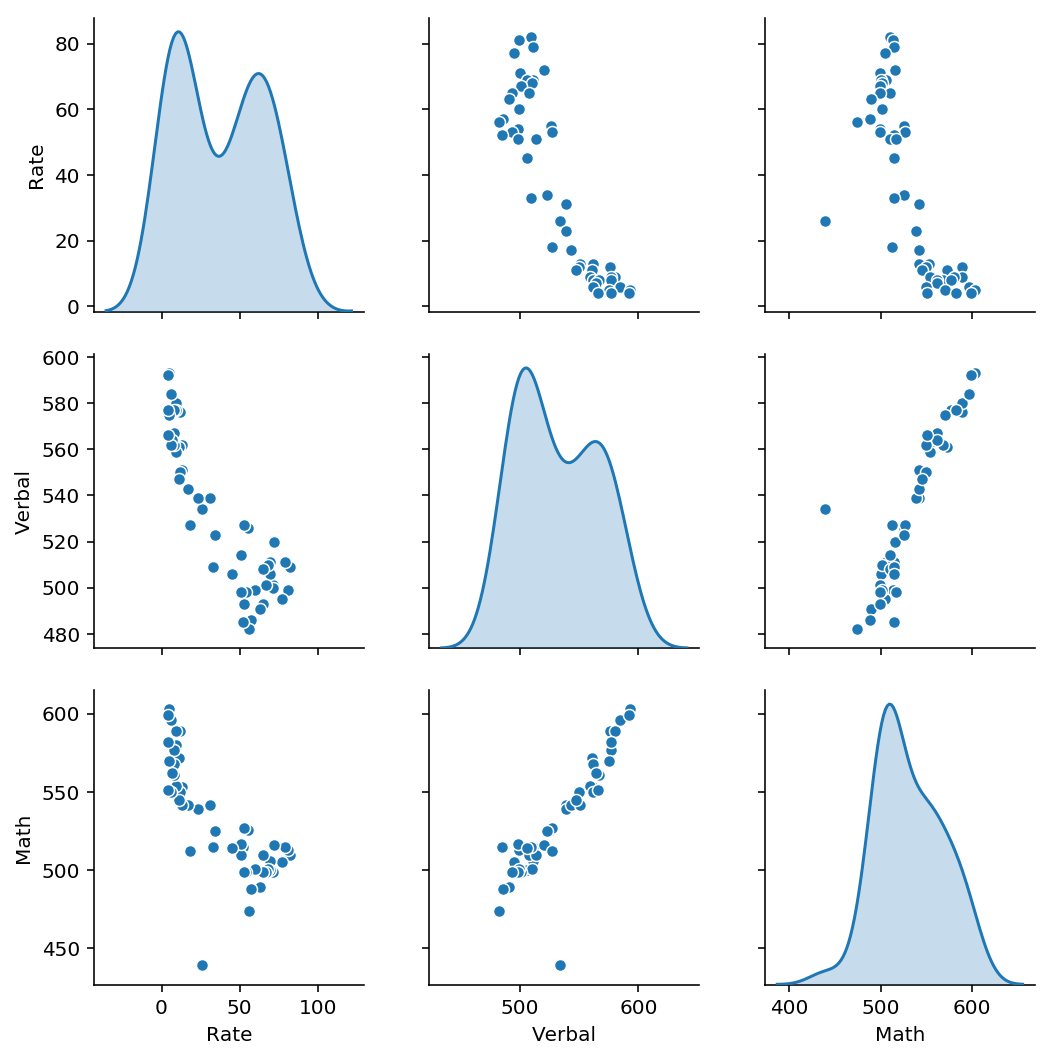

In [70]:
sns.pairplot(df, diag_kind="kde")

there appears to be a positive correlation between verbal and math scores, and a negative correlation between 
the participation rate in taking SATs vs scores achieved in both math and verbal tests. 

the first observation is quite intuitive ie. a motivated student who studies hard for verbal is quite likely to  
study hard for math as well. 

the 2nd observation is less intuitive but no less insightful. why do states with low participation rates in SATs 
have significantly higher average scores than those with high participation rates? it is probably because the students 
who sign up for a test that very few people take are probably much more motivated, and are therefore likely to study harder
and produce better results. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

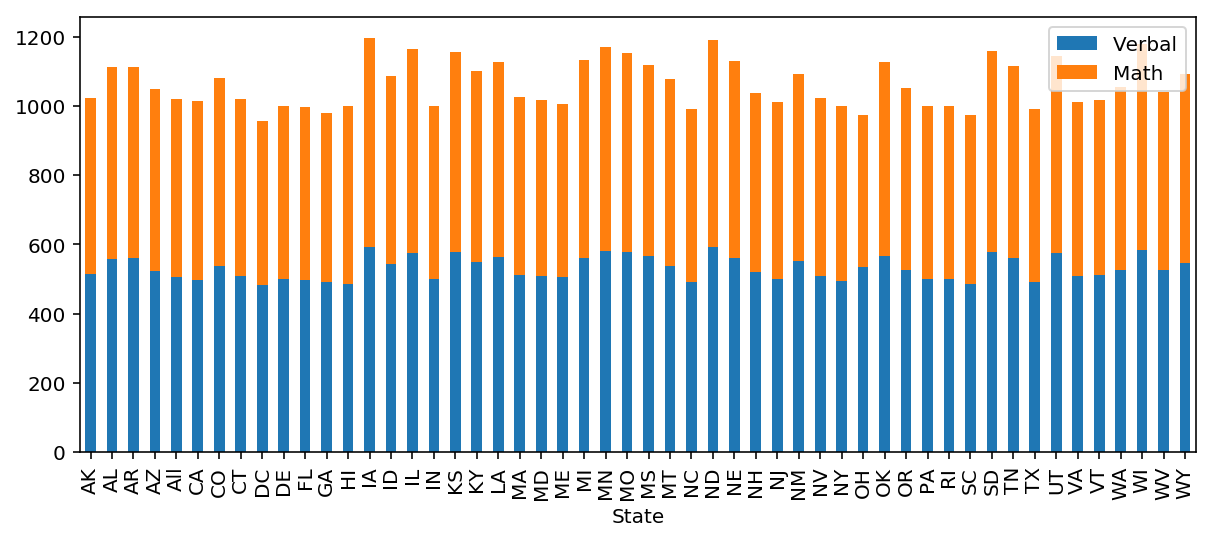

In [71]:
#get rid of ptp rate column
mv = df.drop(['Rate'], axis=1)

#sort values to make histogram look nicer
mv.sort_values('State', ascending=True, inplace=True)

mv.plot.bar(stacked=True, x='State', figsize=(10,4))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

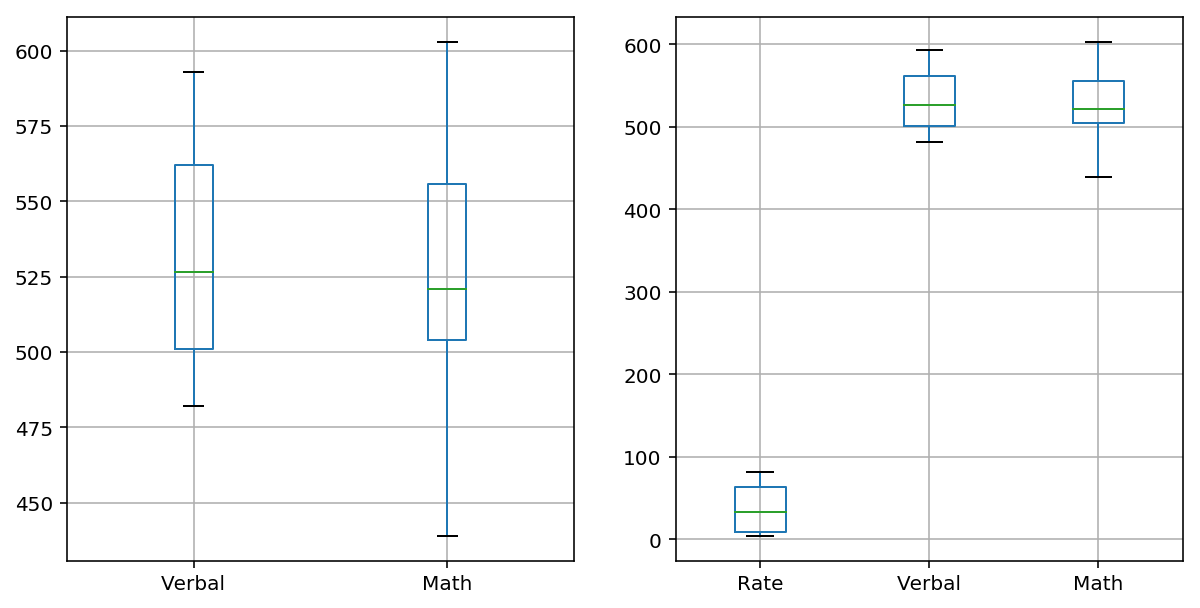

In [72]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
mv.boxplot(ax = ax[0])
df.boxplot(ax = ax[1])

the mean and ranges of verbal and math scores are quite similar (range 400-600), but those for participation rates is not (range 0-100). 
therefore, if plotted on one chart (RHS) the differences are not really meaningful.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


i would standardize all the variables by z-score, ie subtracting from mean, and dividing by std deviation

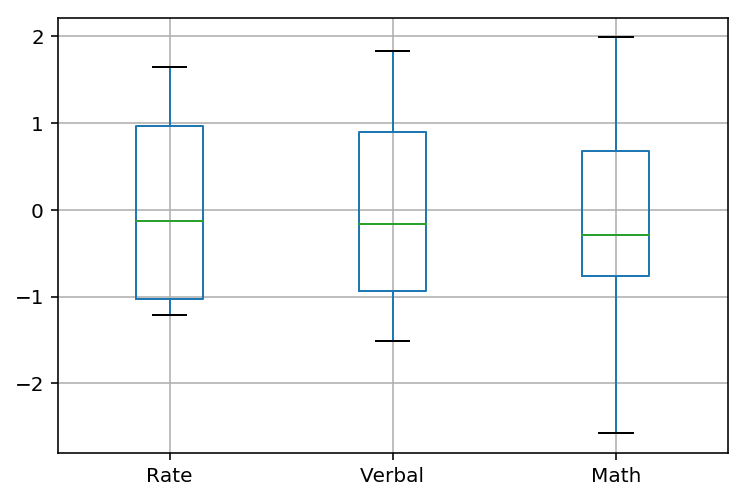

In [73]:
# drop 'state' from dataframe, as it is not a numeric column
dfnew = df.drop('State', axis=1)
# standardize all variables in dfnew
dfnew = (dfnew-dfnew.mean())/dfnew.std()
# print boxplot 
dfnew.boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [74]:
# verbal score mean
vmean = df.Verbal.mean()
vmean

532.0192307692307

In [75]:
# pulls index of states where verbal scores are above mean
vhigh = list(np.where(df['Verbal'] >vmean)[0])
# uses index to pull state names
vhigh = list(df.iloc[vhigh, 0])
print(vhigh)
print('total number of states: {}'.format(len(df)))
print('total number of states with scores above mean: {}'.format(len(vhigh)))
print('percentage above mean: {}%'.format(round(len(vhigh)/len(df)*100),2))      


['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
total number of states: 52
total number of states with scores above mean: 24
percentage above mean: 46%


the distribution of verbal scores is slightly right-skewed, with the mean slightly above the median. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [76]:
vmedian = np.median(df.Verbal)
vmedian

526.5

In [77]:
# pulls index of states where verbal scores are above median
vabove = list(np.where(df['Verbal'] >vmedian)[0])
# uses index to pull state names
vabove = list(df.iloc[vabove, 0])
print(vabove)
print('total number of states with scores above median: {}'.format(len(vabove)))

['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
total number of states with scores above median: 26


since there are 52 states in total, there are 26 above the median and 26 below. that's two more than the mean, which is 
consistent with the conclusion we came to earlier about the right skew of the distribution

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [78]:
df['vminusm'] = df['Verbal']-df['Math']
df.dtypes

State      object
Rate        int64
Verbal      int64
Math        int64
vminusm     int64
dtype: object

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [79]:
# top 10 Verbal - Math scores
df1 = df.sort_values('vminusm', ascending=False).head(10)
df1

,State,Rate,Verbal,Math,vminusm
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [80]:
# top 10 Math - Verbal scores
df2 = df.sort_values('vminusm').head(10)
df2

,State,Rate,Verbal,Math,vminusm
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


In [81]:
print(df1.head(3))
print(df2.head(3))

   State  Rate  Verbal  Math  vminusm
27    OH    26     534   439       95
50    MS     4     566   551       15
29    WV    18     527   512       15
   State  Rate  Verbal  Math  vminusm
21    HI    52     485   515      -30
23    CA    51     498   517      -19
1     NJ    81     499   513      -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


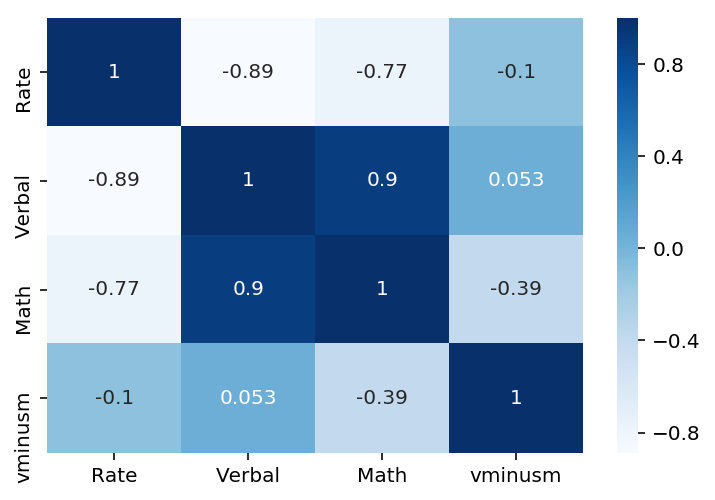

In [82]:
# dropping State variable

dfnew = df.drop('State', axis=1)
sns.heatmap(dfnew.corr(), annot=True, cmap = 'Blues')
# labels = ['Rate', 'Verbal', 'Math', 'Verbal - Math']
# fig, ax = plt.subplots()
# ax.pcolor(dfnew.corr(), cmap=plt.cm.Blues)
# ax.set_xticks(np.arange(5)+0.5) # center x ticks
# ax.set_yticks(np.arange(5)+0.5) # center y ticks
# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels)
# corr.style.background_gradient().set_precision(2)
# plt.show()

Math and Verbal scores are highly positively correlated, whilst both verbal and math scores are highly negatively correlated to test participation rates. There is no particularly strong correlation between the difference in Verbal and Math scores (vminusm) and participation rates. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [83]:
df.describe()

,Rate,Verbal,Math,vminusm
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


count = number of observations
mean = average column value
std = standard deviation of column values ie. approx 68% of all observations in the dataset lie within mean+/-std 
min = lowest column value
25% = between the min and this value is where 1/4 of the lowest column values fall.
50% = this is the 'midpoint' or median value, with 50% of the values below and 50% of the values above
75% = 75% of the column values are below this value. 
max = this is the highest column value


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [84]:
cov = dfnew.cov()
cov

,Rate,Verbal,Math,vminusm
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
vminusm,-43.552036,27.499623,-219.931373,247.430995


In [85]:
df.corr()

,Rate,Verbal,Math,vminusm
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
vminusm,-0.101412,0.052600,-0.388219,1.000000


1. the covariance matrix is not 'standardized' ie it just measures the absolute distance of the x,y observations from the mean
2. correlation = covariance(x,y) / (std deviation(x)* std deviation(y))
3. correlation allows comparison across variables because the results are standardized to indicate the direction AND strength of the linear relationship between the variables. because it is not standardized, covariance only reveals direction of relationship but not strength. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [86]:
# use = % users in age group
# freq = usage in last 12 months

drug = pd.read_csv('drug-use-by-age.csv', index_col='age')
drug.head()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [87]:
drug.columns

Index(['n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [88]:
drug.index

Index(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype='object', name='age')

In [89]:
drug.shape

(17, 27)

In [90]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [91]:
drug.dtypes

n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [92]:
# change strings to floats
for x in drug.select_dtypes(include='object'):
    drug[x] = drug[x].apply(pd.to_numeric, errors='coerce')

In [93]:
# fill null values with None. 
drug.fillna(value=np.nan, axis = 1,inplace=True)

In [94]:
# remove 65+ age group (reasons at end of question)
drug.drop('65+', axis=0, inplace=True)

In [95]:
#create dataframe to explore relationships betweeen various drug use percentages
druguse = np.where(drug.columns.str.contains('use', case=False))
druguse = list(druguse[0])
druguse = drug.iloc[:, druguse]


In [96]:
#create dataframe to explore relationships betweeen various drug use frequencies
drugfreq = np.where(drug.columns.str.contains('frequency', case=False))
drugfreq = list(drugfreq[0])
drugfreq = drug.iloc[:, drugfreq]


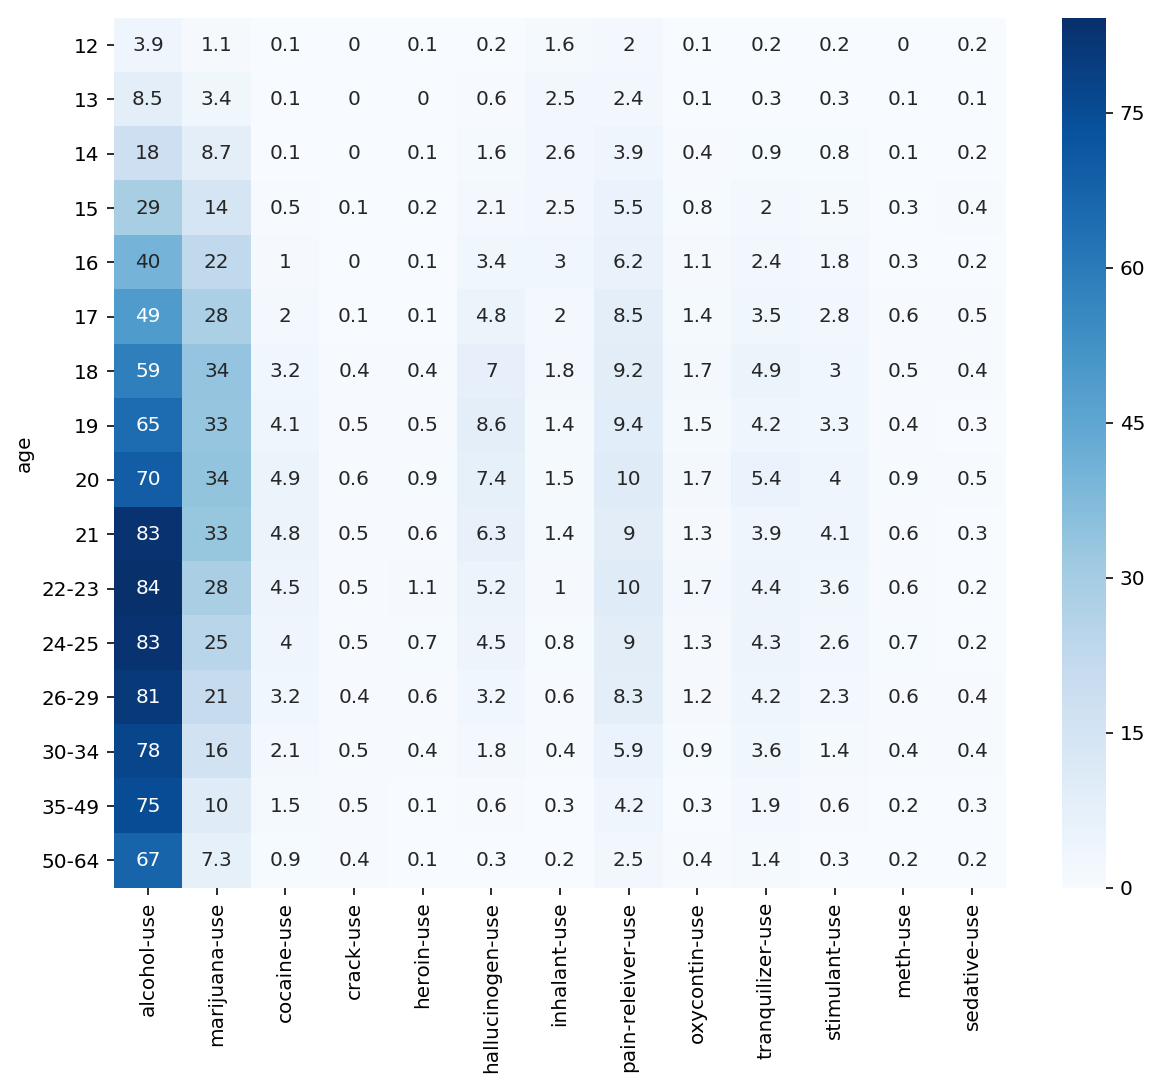

In [97]:
fig, ax =plt.subplots(1,1, figsize=(10,8))
ax = sns.heatmap(druguse, annot=True, cmap='Blues')

In [98]:
druguse.max().sort_values(ascending=False).head()

alcohol-use          84.2
marijuana-use        34.0
pain-releiver-use    10.0
hallucinogen-use      8.6
tranquilizer-use      5.4
dtype: float64

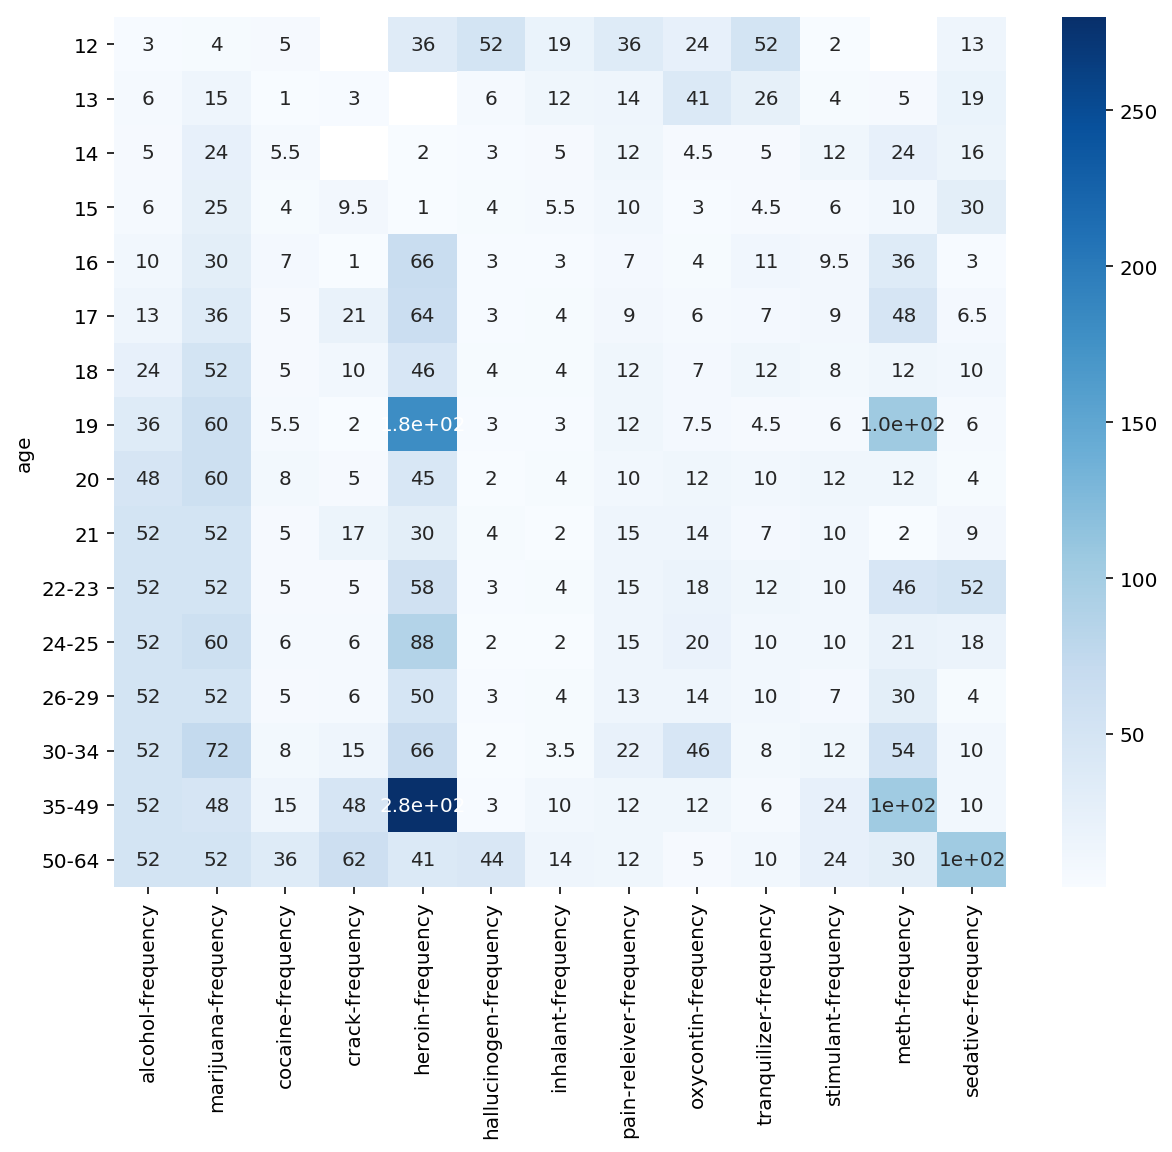

In [99]:
fig, ax =plt.subplots(1,1, figsize=(10,8))
ax = sns.heatmap(drugfreq, annot=True, cmap='Blues')

In [100]:
drugfreq.max().sort_values(ascending=False).head()

heroin-frequency       280.0
meth-frequency         105.0
sedative-frequency     104.0
marijuana-frequency     72.0
crack-frequency         62.0
dtype: float64

In [101]:
drugfreq.sum(axis=1).sort_values(ascending=False).head()

age
35-49    624.0
50-64    485.5
19       430.5
30-34    370.5
22-23    331.0
dtype: float64

In [102]:
drugrank = drug.rank(method='first')

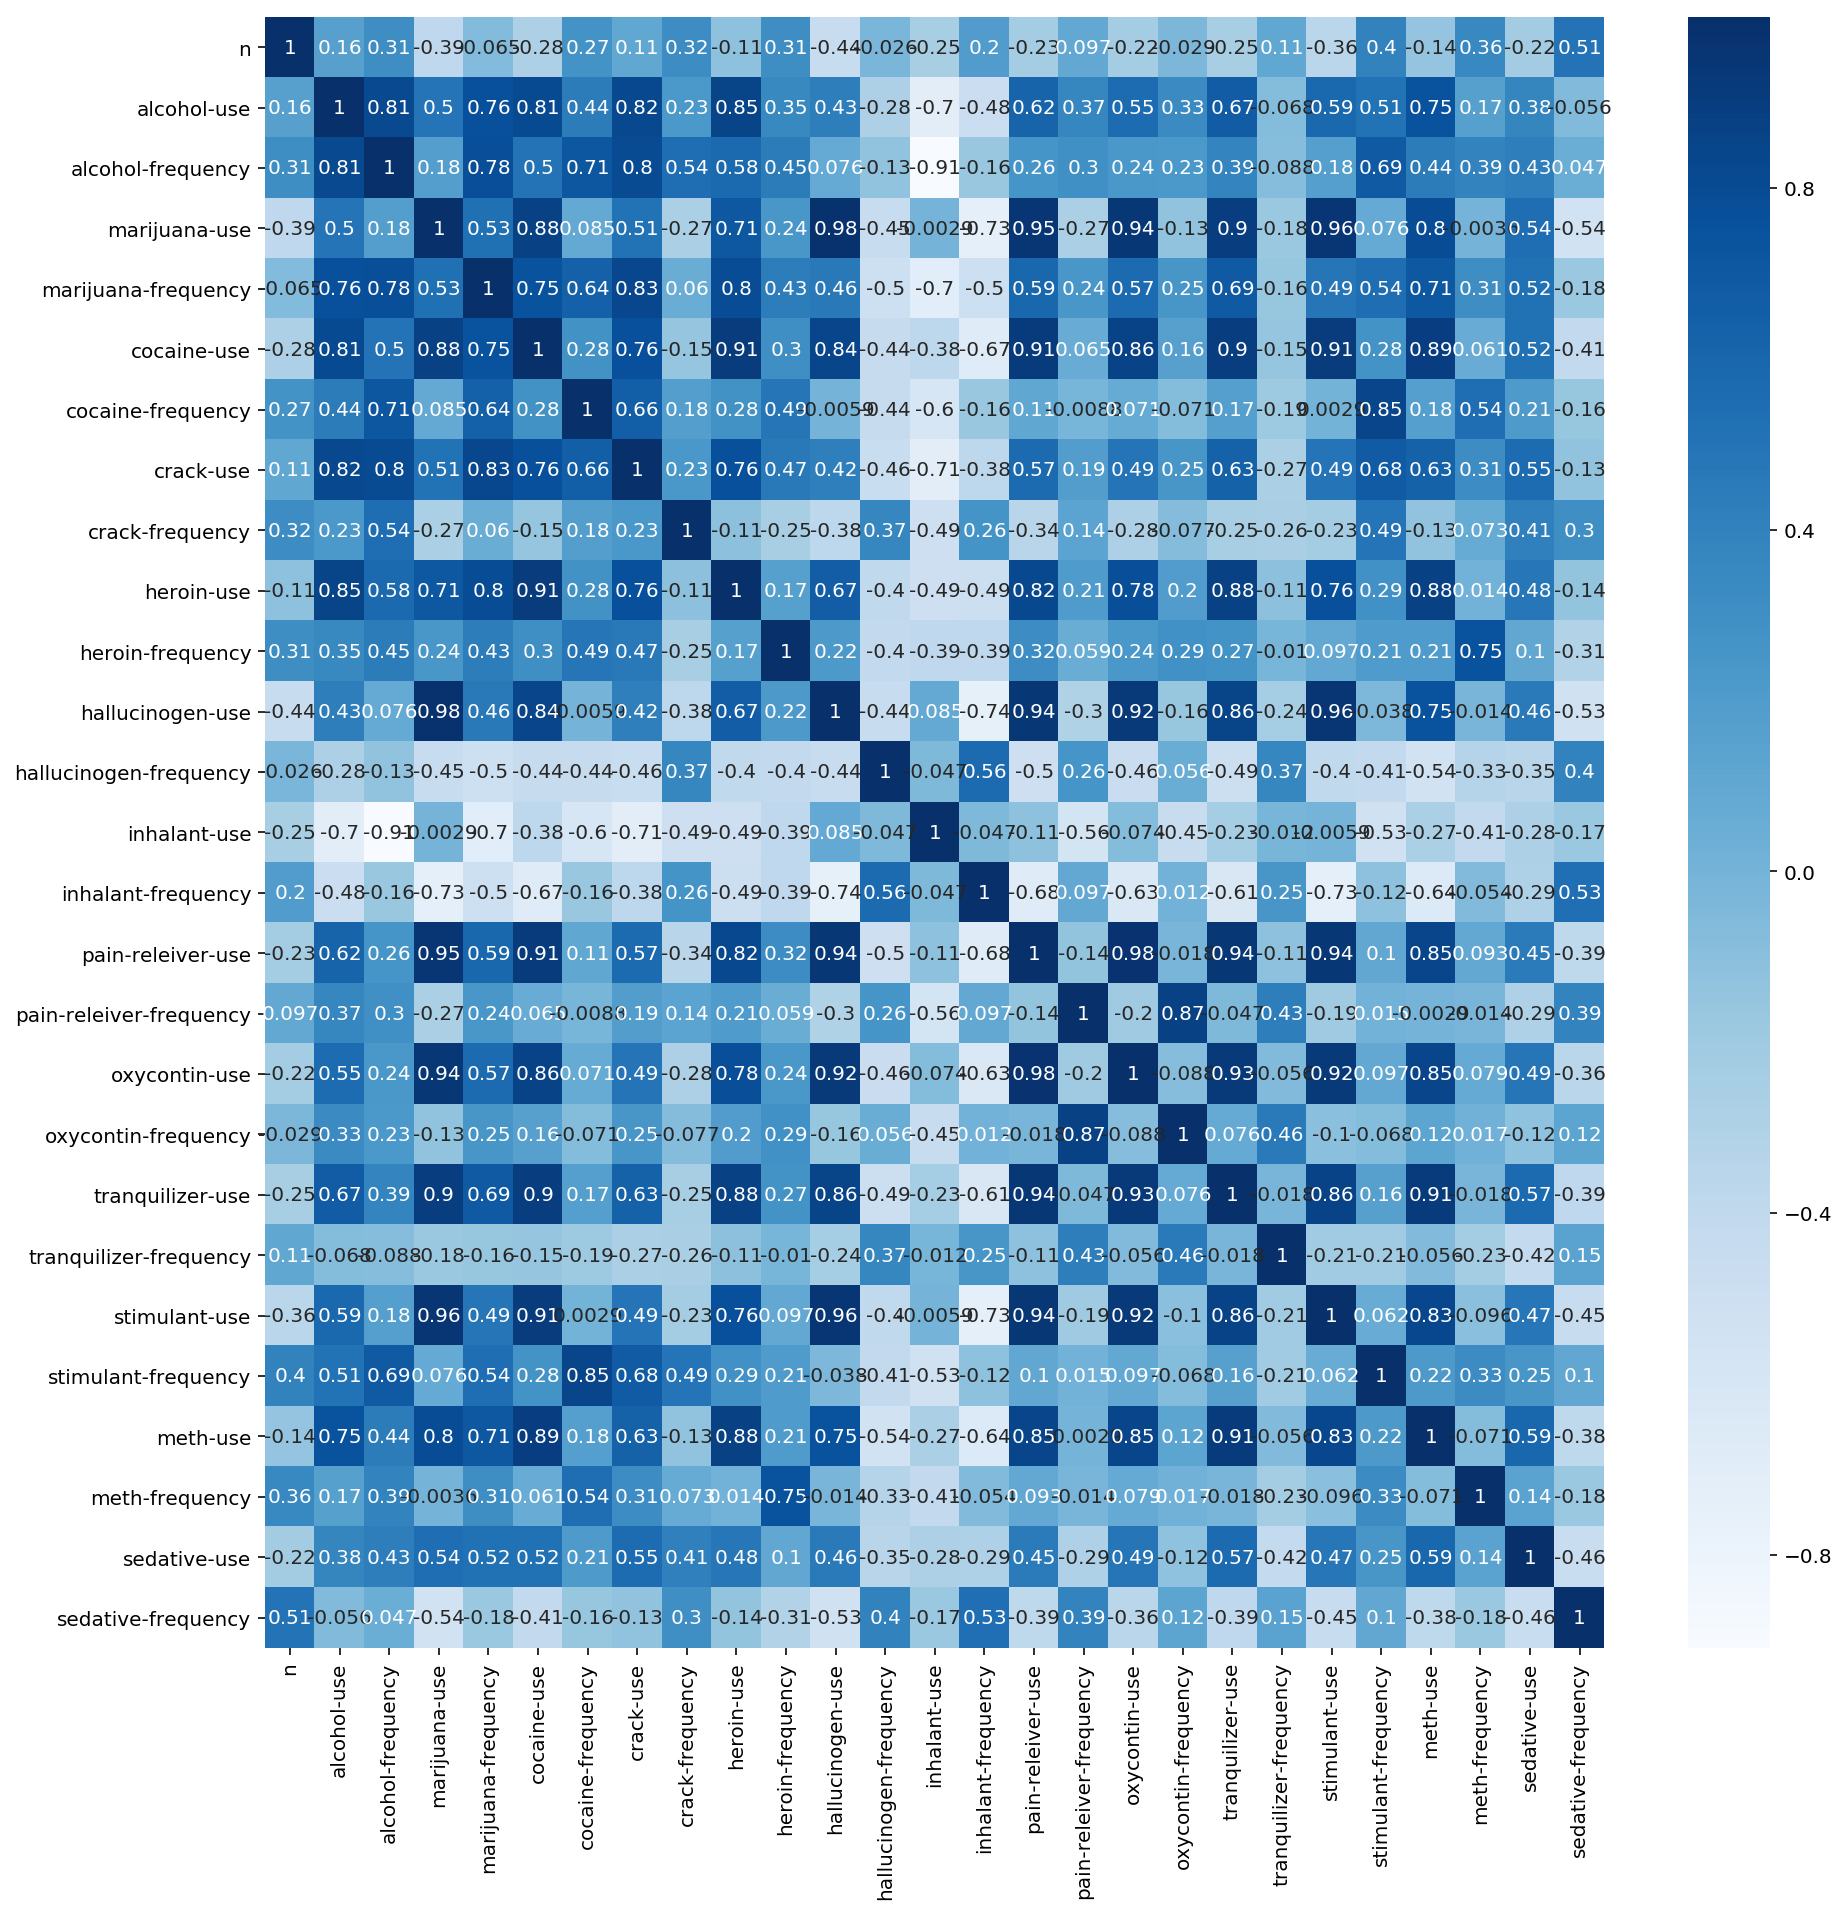

In [103]:
#pairplot each pair of drugs
fig, ax =plt.subplots(1,1, figsize=(15,15))
ax = sns.heatmap(drugrank.corr(), annot=True, cmap='Blues')

#FINAL RESPONSE - DATASET INFERENCE
the dataset 
alcohol and marijuana are the most popular drugs, with a median usage by 64.6% and 20.8% of surveyed population across all age groups respectively. 

age bands are all over the place, starting off with single years and then graduating to 2yr, 3yr etc to a maximum of 15 year bands. as the explanatory column descriptions were pretty vague about exactly what percentage of population it derives from (ie is it n or is n the % of the population in question) this was left as is. ideally the data should have been aggregated by equidistant age bands.

data is quite sparse in the 65+ age group and there are huge spikes in heroin and stimulant frequency (esp compared to the previous age band) which makes the quality of the data suspect. this led to the decision to remove the entire row. 

also, we note that alcohol % use for ages 21 and above are 52% at ALL agebands, making the data slightly suspect. 



### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Question: From the correlation heatmap generated in the previous question, there seems to be a strong negative correlation between alcohol and inhalant use within the sample populations. we will conduct a t-test to ascertain whether the 

    null hypothesis = no correlation between alcohol and inhalant use

can be rejected for the 

    alternative hypothesis = that there is a statistically significant negative relationship between the two. 
    
we will set the confidence interval threshold at the standard 95%

In [104]:
pearson_coef, p_value = stats.pearsonr(druguse['alcohol-use'], druguse['inhalant-use'])

In [105]:
print(pearson_coef, p_value)

-0.7284753157551024 0.0013721715896310139


since p_value < 0.05, we conclude that the observed pearson correlation coefficient of -0.73 is statistically significant and can with 95% confidence reject the null hypothesis that there is no correlation between alcohol and inhalant use. 

In [113]:
druguse['inhalant-use']

age
12       1.6
13       2.5
14       2.6
15       2.5
16       3.0
17       2.0
18       1.8
19       1.4
20       1.5
21       1.4
22-23    1.0
24-25    0.8
26-29    0.6
30-34    0.4
35-49    0.3
50-64    0.2
Name: inhalant-use, dtype: float64

C:\Users\schen24\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


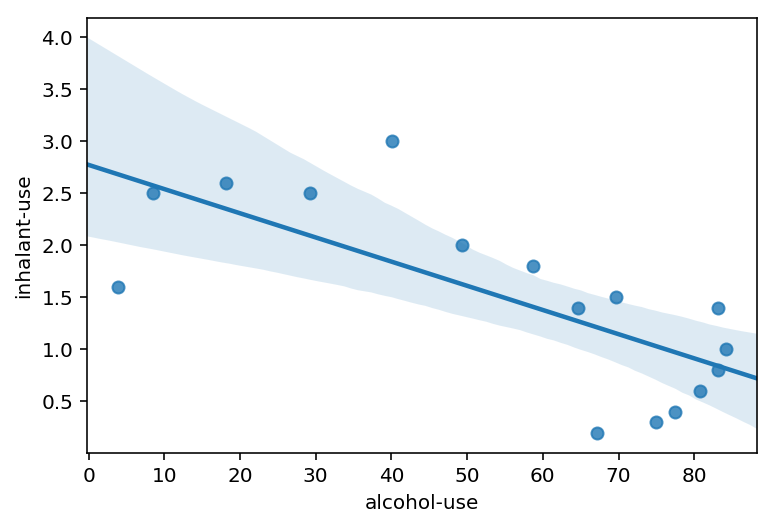

In [121]:

sns.regplot(x=druguse['alcohol-use'], y=druguse['inhalant-use'])

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [45]:
# SAT 
# look at the Rate variable for #1 
mv.head()
# 2std dev covers approx 95% of total popn. Finding cutoffs at mean +/- 2*std
vplus = mv.Verbal.mean() + 2*mv.Verbal.std()
vminus =mv.Verbal.mean() - 2*mv.Verbal.std()
mplus = mv.Math.mean() + 2*mv.Math.std()
mminus = mv.Math.mean() - 2*mv.Math.std()
#find outliers
print('Verbal: {}\n'.format(mv[(mv.Verbal <vminus) | (mv.Verbal > vplus)]))
print('Math: {}'.format(mv[(mv.Math <mminus) | (mv.Math > mplus)]))

Verbal: Empty DataFrame
Columns: [State, Verbal, Math]
Index: []

Math:    State  Verbal  Math
27    OH     534   439


In [46]:
#remove index #27 
mvnew = mv.drop(27, axis=0)

In [47]:
mv.describe()

,Verbal,Math
count,52.000000,52.000000
mean,532.019231,531.500000
std,33.236225,36.014975
min,482.000000,439.000000
25%,501.000000,504.000000
50%,526.500000,521.000000
75%,562.000000,555.750000
max,593.000000,603.000000


In [48]:
mvnew.describe()

,Verbal,Math
count,51.000000,51.000000
mean,531.980392,533.313725
std,33.565751,33.890111
min,482.000000,474.000000
25%,501.000000,505.500000
50%,526.000000,525.000000
75%,562.000000,557.500000
max,593.000000,603.000000


for the OH state outlier, Verbal score was 534 (above mean, above median) and Math score 439 (below mean, below median). 

after it was removed, Verbal mean and median fell (because the removed item was higher than average) while Math mean and median rose (because the removed item was lower than average). 

standard deviations for verbal increased because the removed item was quite close to the mean, while std for math decreased because the removed item was far away from the mean. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [49]:
df.corr()

,Rate,Verbal,Math,vminusm
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
vminusm,-0.101412,0.052600,-0.388219,1.000000


In [50]:
df.corr(method='spearman') 

,Rate,Verbal,Math,vminusm
Rate,1.000000,-0.833294,-0.813275,-0.014266
Verbal,-0.833294,1.000000,0.905205,0.060244
Math,-0.813275,0.905205,1.000000,-0.239883
vminusm,-0.014266,0.060244,-0.239883,1.000000


#1
the pearson correlation is based on true values whereas spearman is based on ranked values. the former is a linear correlation whereas the latter is a monotonic (ordered) one. 

#2
the spearman correlation is calculated by taking two sets of values and ranking each set of values. the ranked values are then subtracted from each other and squared, multiplied by 6 and then divided by (the cube of number of observations minus number of observations). this number is then subtracted from 1. the result falls between -1 and 1, with both extremes indicated perfect negative and positive correlation respectively. 


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [51]:
#1
ratelist = list(df['Rate'])
percentilerate = []
for r in ratelist:
    p = stats.percentileofscore(ratelist, r, kind='rank')
    percentilerate.append(p)

df['percentilerate'] = percentilerate
df.head()

,State,Rate,Verbal,Math,vminusm,percentilerate
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


In [52]:
#2
df[df.State=='CA']['percentilerate']

23    56.730769
Name: percentilerate, dtype: float64

#3
percentiles are also ranked, or ordered values which depend on their relative position in the list of observations. in the above example, the order of states calculated by percentile will correspond exactly to their spearman rank eg. the highest percentile state (CT) will be ranked 1, followed by NJ, then MA etc. 

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

#1 you can find outliers in the last xth percentiles easily

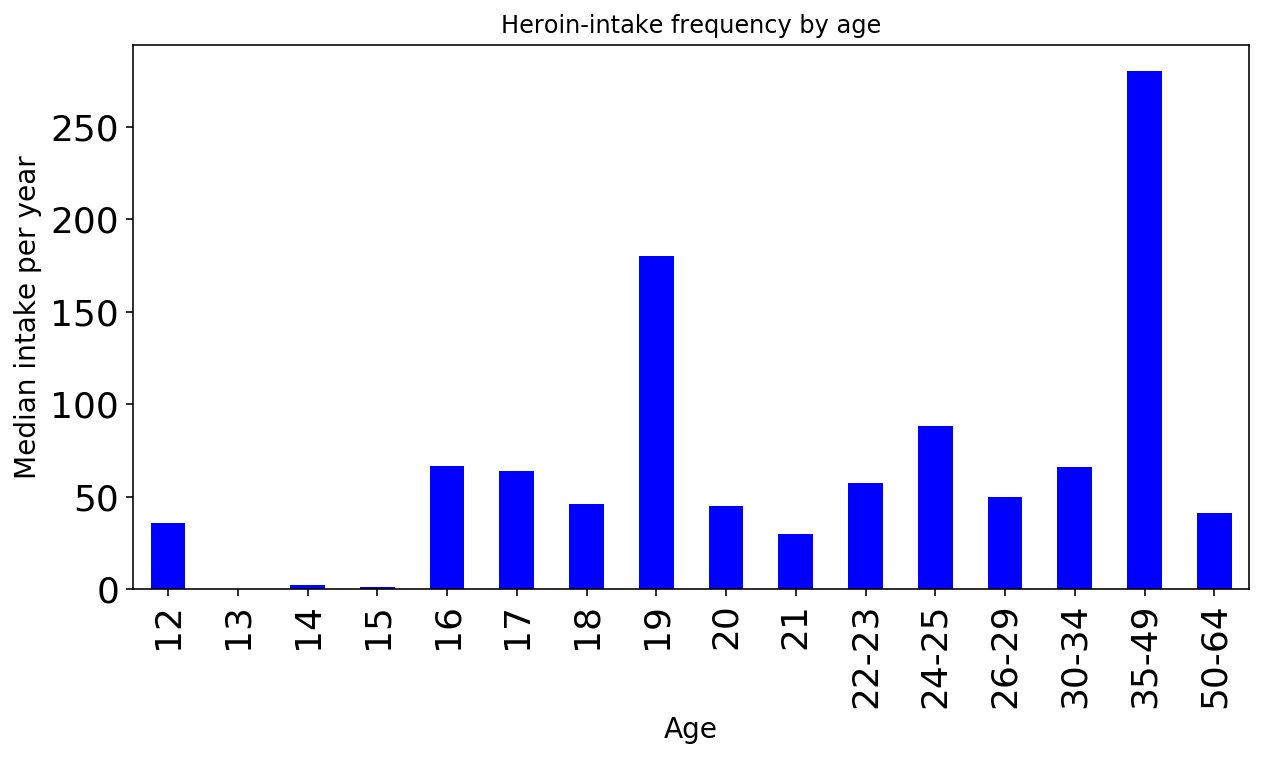

In [53]:
#2 heroin-frequency variabel chosen
ax = drugfreq['heroin-frequency'].plot(kind='bar', title ="Heroin-intake frequency by age", figsize=(10, 5), legend=False, fontsize=18, colormap='winter')
ax.set_xlabel("Age", fontsize=14)
ax.set_ylabel("Median intake per year", fontsize=14)
ax.set_xticklabels(list(drug.index))
plt.show()



In [54]:
#3 generating percentile variable
ratelist = list(drugfreq['heroin-frequency'])
percentilerate = []
for r in ratelist:
    p = stats.percentileofscore(ratelist, r, kind='rank')
    percentilerate.append(p)

drugfreq['percentilerate'] = percentilerate

C:\Users\schen24\Anaconda3\lib\site-packages\scipy\stats\stats.py:1795: RuntimeWarning: invalid value encountered in less
  left = np.count_nonzero(a < score)
C:\Users\schen24\Anaconda3\lib\site-packages\scipy\stats\stats.py:1796: RuntimeWarning: invalid value encountered in less_equal
  right = np.count_nonzero(a <= score)
C:\Users\schen24\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


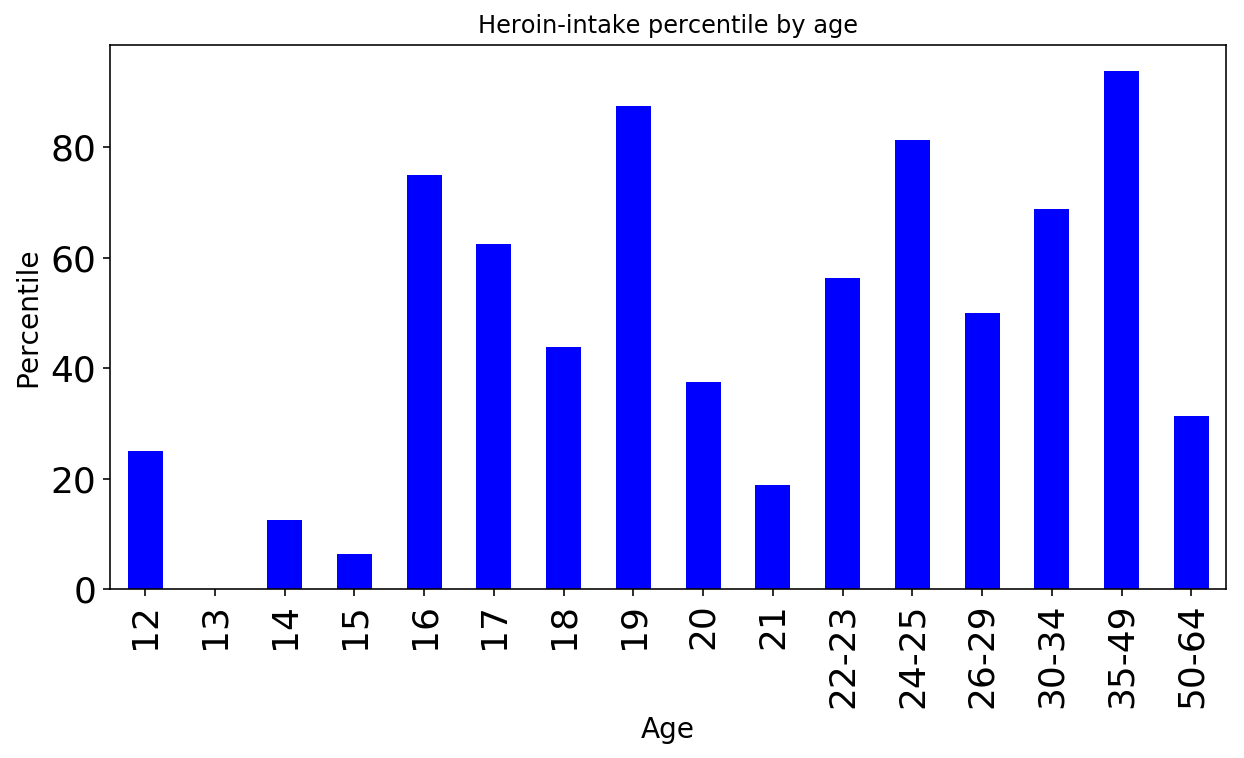

In [55]:
#plotting against age
ax = drugfreq['percentilerate'].plot(kind='bar', title ="Heroin-intake percentile by age", figsize=(10, 5), legend=False, fontsize=18, colormap='winter')
ax.set_xlabel("Age", fontsize=14)
ax.set_ylabel("Percentile", fontsize=14)
ax.set_xticklabels(list(drugfreq.index))
plt.show()

#4 converting raw scores to percentiles 'smooths out' the huge variances in score, without sacrificing the relative position ranks. Note also that y-axis measure has changed from absolute to relative. 